In [1]:
# Impoter necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_processing import load_data, clean_data, scale_features
from src.pca_analysis import run_pca, pca_dataframe
from src.clustering import run_kmeans, evaluate_clusters, attach_clusters

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

In [5]:
# Load and prepare the data
DATA_PATH = "Stars.csv"

df = load_data(DATA_PATH)
df = clean_data(df)

X_scaled, scaler = scale_features(df)

In [7]:
# Principal Component Analysis (PCA)
X_pca, pca_model = run_pca(X_scaled)
print("Explained variance ratio:")
print(pca_model.explained_variance_ratio_)
print(f"Total variance explained: {pca_model.explained_variance_ratio_.sum():.2f}")

Explained variance ratio:
[0.60357391 0.23500784]
Total variance explained: 0.84


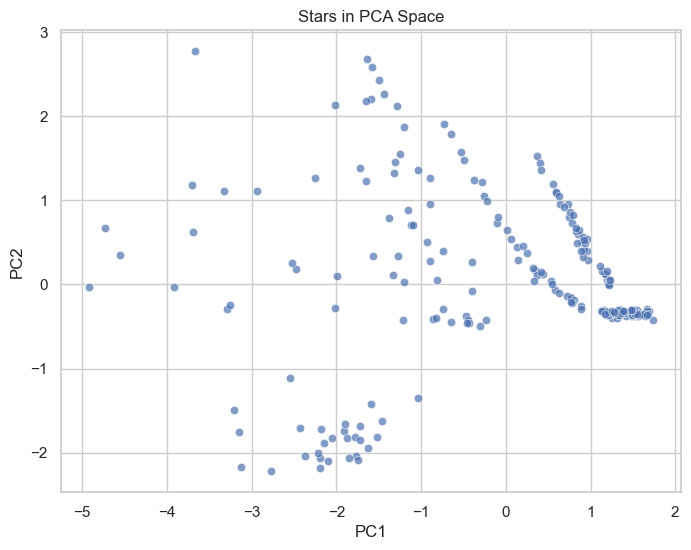

In [9]:
# PCA Visualization
pca_df = pca_dataframe(X_pca, df)
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    alpha=0.7
)
plt.title("Stars in PCA Space")
plt.show()

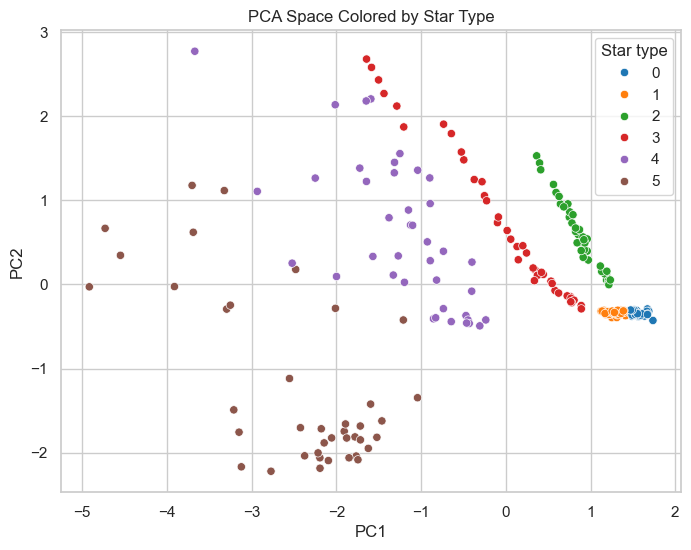

In [11]:
# Comparison to known star types
if "Star type" in pca_df.columns:
    sns.scatterplot(
        x="PC1",
        y="PC2",
        hue="Star type",
        data=pca_df,
        palette="tab10"
    )
    plt.title("PCA Space Colored by Star Type")
    plt.show()

In [13]:
# K-Means clustering
kmeans_model, labels = run_kmeans(X_pca, n_clusters=6)
sil_score = evaluate_clusters(X_pca, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.578


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


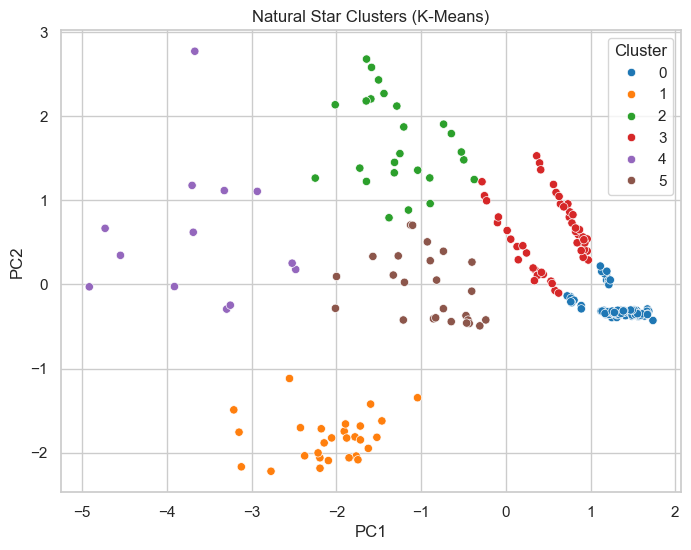

In [15]:
# PCA + Clustering
pca_df["Cluster"] = labels
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Cluster",
    data=pca_df,
    palette="tab10"
)
plt.title("Natural Star Clusters (K-Means)")
plt.show()


In [17]:
# Attach Clusters
df_clustered = attach_clusters(df, labels)
df_clustered.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Cluster
0,3068,0.002400,0.1700,16.12,0,Red,M,0
1,3042,0.000500,0.1542,16.60,0,Red,M,0
2,2600,0.000300,0.1020,18.70,0,Red,M,0
3,2800,0.000200,0.1600,16.65,0,Red,M,0
4,1939,0.000138,0.1030,20.06,0,Red,M,0
